In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/D2-1'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucD21"
# anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow
anndata = sdata.table
# delete anndata
# del sdata.table
# create anndata
# sdata.table = anndata

In [3]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs', 'Cleanliness',
       'annotation', 'Hep', 'annotationSave'],
      dtype='object')

In [4]:
anndata.write(OUTPUT_DIR + '/' + name_anndata + '.h5ad')

In [5]:
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

In [6]:
# Markers Martin

In [7]:
path_mg_Martin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"

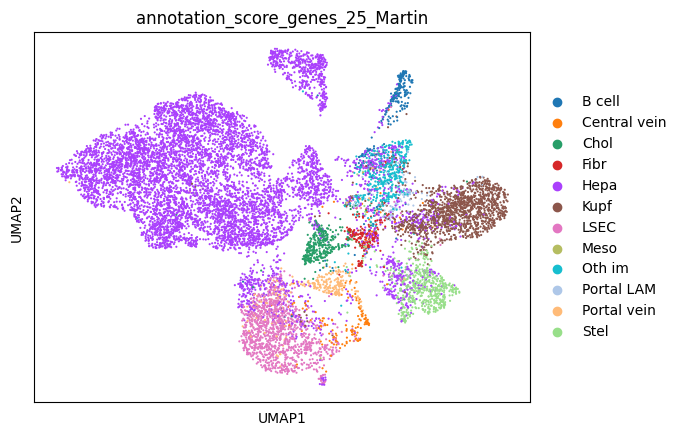

              annotation_score_genes_25_Martin
B cell                                2.100807
Central vein                          1.310009
Chol                                  2.915568
Fibr                                  1.581596
Hepa                                 60.060708
Kupf                                 10.815560
LSEC                                  9.952872
Meso                                  0.007988
Oth im                                3.442767
Portal LAM                            1.014458
Portal vein                           2.244588
Stel                                  4.553079


In [8]:
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_Martin,
    bins = 25,
    suffix = '_Martin'
    )
visualize_classification(anndata,'annotation_score_genes_25_Martin','umap_15',path_mg_Martin,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

Hepa            55.451713
Kupf            11.614346
LSEC            11.558431
Stel             5.990894
Oth im           3.898075
Fibr             2.787763
Chol             2.268552
B cell           2.156722
Portal vein      1.645499
Portal LAM       1.397875
Central vein     0.934579
Meso             0.167745
Unknown          0.127806
Name: annotation_own_score_genes_Martin, dtype: float64


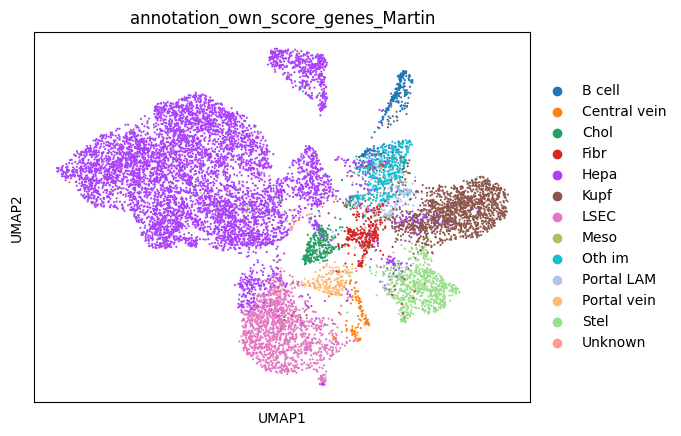

5.016375109833054


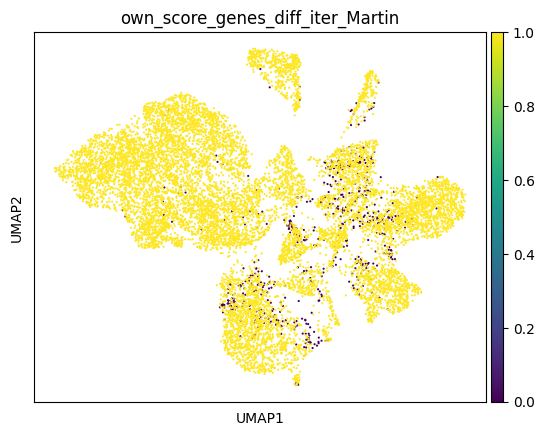

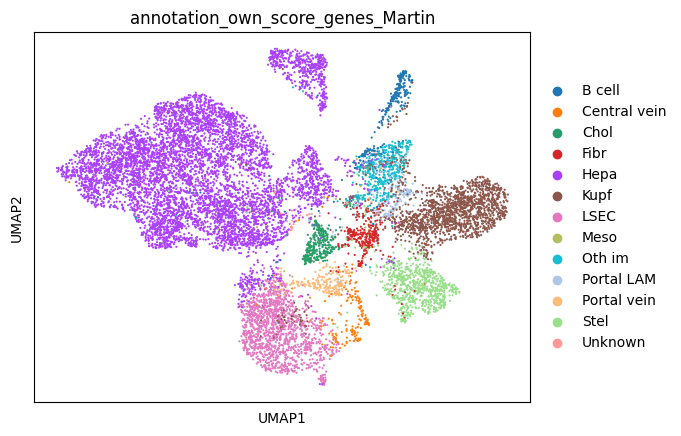

Hepa            52.703890
Kupf            13.259845
LSEC            11.278856
Stel             6.214554
Oth im           3.754293
Fibr             2.612030
Chol             2.564103
B cell           2.396358
Portal vein      1.765317
Portal LAM       1.629523
Central vein     1.405863
Meso             0.287563
Unknown          0.127806
Name: annotation_own_score_genes_Martin, dtype: float64
0.7109194025081876


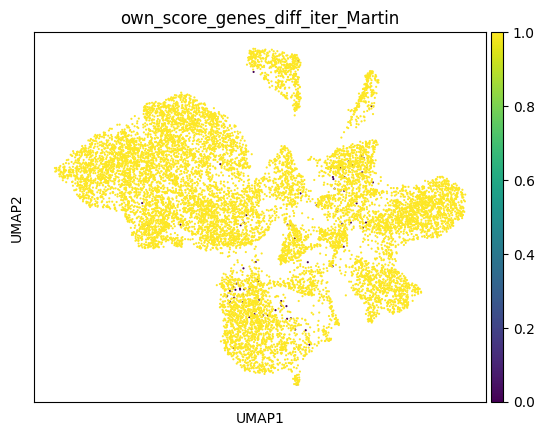

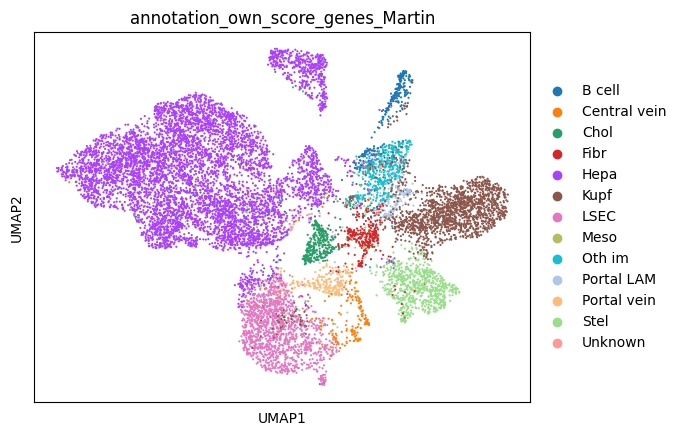

Hepa            52.320473
Kupf            13.483505
LSEC            11.278856
Stel             6.214554
Oth im           3.658439
Chol             2.635993
Fibr             2.620018
B cell           2.412333
Portal vein      1.757329
Portal LAM       1.701414
Central vein     1.453790
Meso             0.335490
Unknown          0.127806
Name: annotation_own_score_genes_Martin, dtype: float64
0.1278057352823708


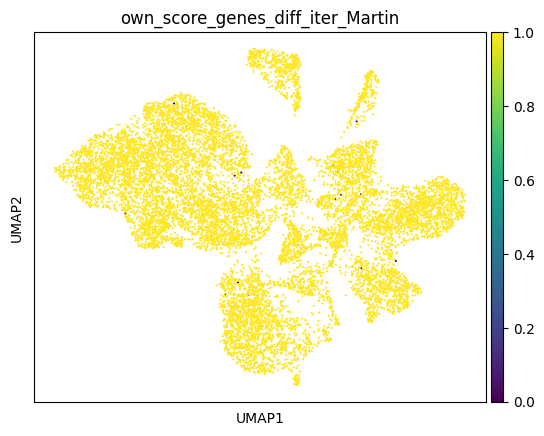

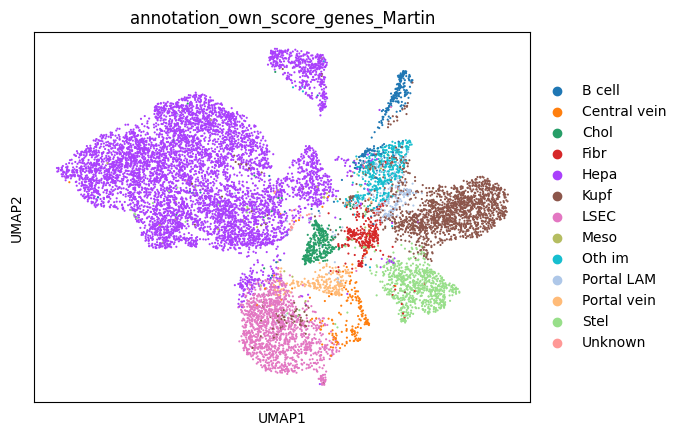

Hepa            52.256570
Kupf            13.531432
LSEC            11.286844
Stel             6.222542
Oth im           3.618500
Chol             2.651969
Fibr             2.620018
B cell           2.404345
Portal vein      1.757329
Portal LAM       1.725377
Central vein     1.461778
Meso             0.335490
Unknown          0.127806
Name: annotation_own_score_genes_Martin, dtype: float64
0.01597571691029635
converged


,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,-0.383453,3.395270,0.130246,-0.597614,-0.623747,-3.517950,-0.974283,-4.756259,-1.537020,NaN,-3.047170,-0.408475
1,4.705353,NaN,NaN,NaN,0.325387,NaN,-4.074015,-4.675397,NaN,NaN,NaN,NaN
2,2.581770,NaN,NaN,NaN,-1.313556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,5.333316,NaN,NaN,NaN,NaN,0.031781,NaN
4,NaN,-1.787634,-2.592609,-3.487903,-2.795964,-4.821058,-4.597725,NaN,-1.563636,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12514,13.612028,-3.725390,NaN,NaN,0.604008,-4.119408,-3.217803,-4.261338,NaN,NaN,-4.098769,NaN
12515,9.425396,-4.432619,-3.714208,-4.609501,0.512608,-5.562427,NaN,NaN,NaN,NaN,-4.335337,NaN
12516,5.277826,3.728525,-1.849063,-2.744357,-1.264945,-0.019880,NaN,-5.630866,-1.510823,-1.054601,-2.050181,NaN
12517,3.835439,-4.348355,-1.542470,-2.437764,19.985840,-5.555074,-1.960118,-4.208373,NaN,NaN,4.106666,-0.045139


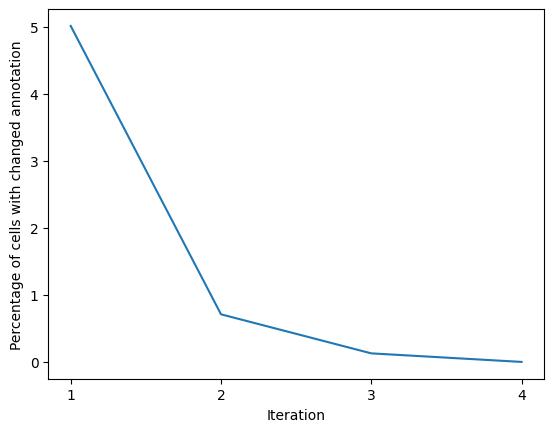

In [9]:
own_score_genes_iterative(anndata,path_mg_Martin,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Martin',genes_not_in_var_names=[])

In [10]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs',
       'cleanliness_score_genes_25_Martin', 'annotation_score_genes_25_Martin',
       'annotationSave', 'Hep', 'score_celltype_own_score_genes_Martin',
       'second_score_c

In [11]:
anndata.write(OUTPUT_DIR + '/' + name_anndata + '_Martin.h5ad')

In [ ]:
# Markers Michiel

In [ ]:
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_Martin.h5ad') 

In [ ]:
path_mg_Michiel = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMichiel_othIm_endoSplit_portalLAM.csv"

In [ ]:
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_Michiel,
    bins = 25,
    suffix = '_Michiel')
visualize_classification(anndata,'annotation_score_genes_25_Michiel','umap_15',path_mg_Michiel,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [ ]:
iterative_score_genes(anndata,path_mg_Michiel,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Michiel')

In [ ]:
anndata.obs.columns

In [ ]:
anndata.write(OUTPUT_DIR + '/' + name_anndata + '_Michiel.h5ad')

In [ ]:
# Markers Atlas

In [ ]:
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_Michiel.h5ad')

In [ ]:
path_mg_Atlas = ""

In [ ]:
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_Atlas,
    bins = 25,
    suffix = '_Atlas'
    )
visualize_classification(anndata,'annotation_score_genes_25_Atlas','umap_15',path_mg_Atlas,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [ ]:
iterative_score_genes(anndata,path_mg_Atlas,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Atlas')

In [ ]:
anndata.obs.columns

In [ ]:
anndata.write(OUTPUT_DIR + '/' + name_anndata + '_Atlas.h5ad')

In [ ]:
# Tangram

In [ ]:
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_Atlas.h5ad')